In [13]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(stringr)
theme_set(theme_bw())
options(repr.plot.width=7, repr.plot.height=4)

# Introduction

![classical interaction structure](figures/3d-interactions-oliva.png)

We would like to examine and tabulate frequencies of tertiary interactions across our tRNA set. [Oliva et al. 2006](10.1093/nar/gkj491) has this as Table 1: ![classical interaction table](figures/3d-table.png)

The 18G-55U line is troubling, since it doesn't seem to correspond to the Sprinzl 2004 dataset they used to quantify
frequencies. We'll leave it alone for now, and go through all of the other interactions.

In [3]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)

# Tertiary interaction frequencies

## 8-14-21

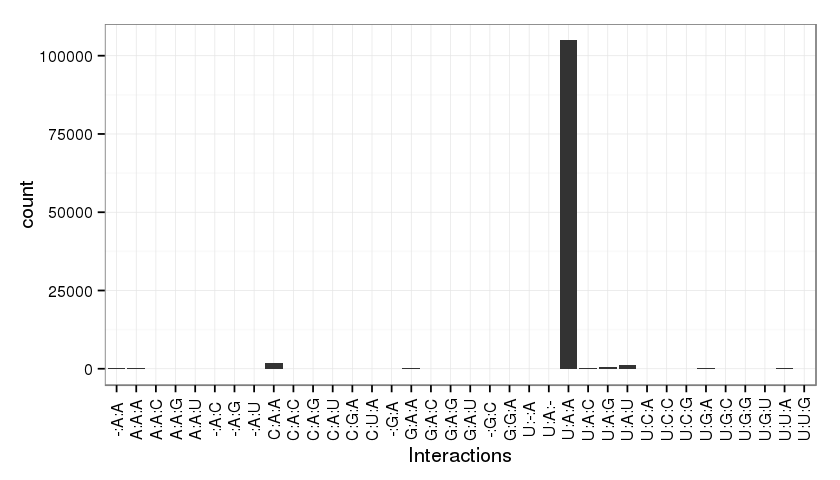

In [4]:
df = identities
df$Interactions = paste0(df$X8, ':', df$X14, ':', df$X21)
ggplot(df, aes(x=Interactions)) + geom_histogram() + theme(axis.text.x=element_text(angle=90, vjust=0.5))

Do these relative frequencies hold if we restrict by species and quality set?

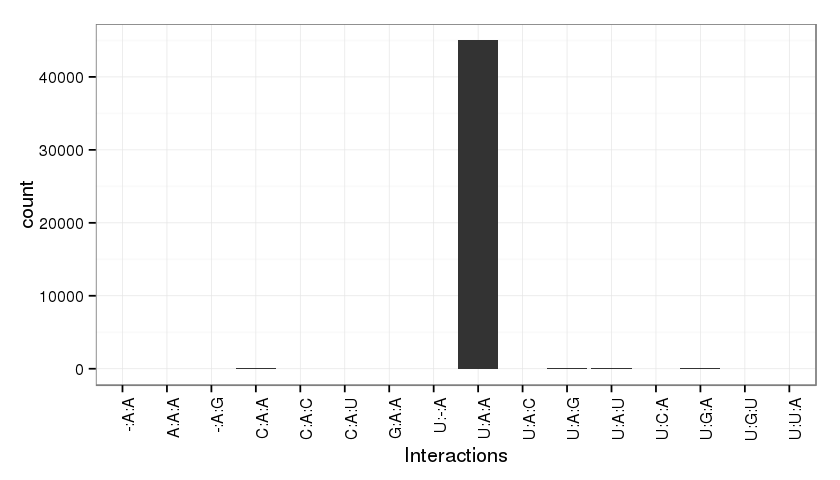

In [5]:
ggplot(df[!df$restrict & df$quality, ], aes(x=Interactions)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

The ratio of U:A:A to the other possibilities shrinks a bit, though it's hard to quantify by how much. Which isotypes are responsible for noncanonical base pairs?

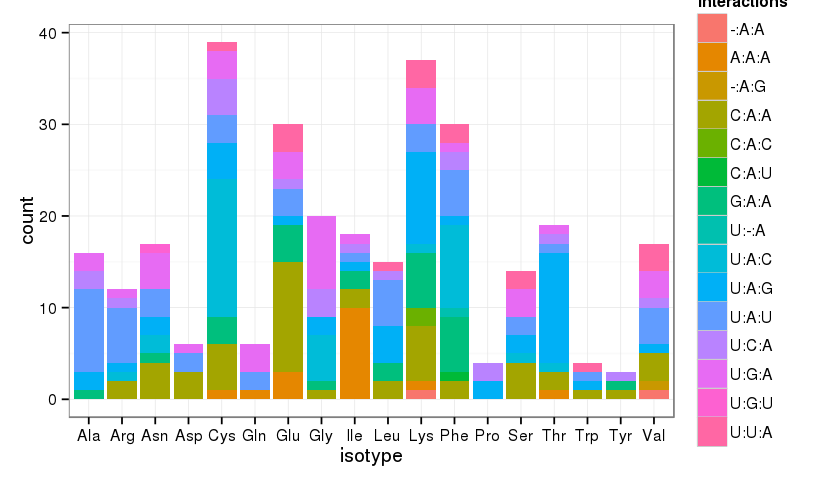

In [6]:
ggplot(df[df$Interactions != 'U:A:A' & !df$restrict & df$quality, ], aes(x=isotype, fill=Interactions)) + geom_bar()

For the most part, it seems that 8-14-21 base combinations are distributed evenly across different isotypes. One exception to this is A:A:A, which seems to be enriched in isoleucine. If it's concentrated in one species, then it's probably a single tRNA amplified sequence, so the scores would be either identical (recent amplification) or very similar.

In [7]:
print(table(droplevels(df[df$Interactions == 'A:A:A' & !df$restrict & df$quality & df$isotype == "Ile", c("species_long", "score")])))

                                                           score
species_long                                                71.9 72.3
  Danio rerio (Zebrafish Sep. 2014 GRCz10/danRer10)            0    1
  Gasterosteus aculeatus (stickleback) (Broad 1.0 Feb 2006)    9    0


What if the score distribution was different between tRNAs with the U:A:A interaction and tRNAs with different bases at 8-14-21? The t-test is useful for looking at differences between score distributions.


	Welch Two Sample t-test

data:  df[df$Group == "U:A:A" & df$quality & !df$restrict, ]$score and df[df$Group != "U:A:A" & df$quality & !df$restrict, ]$score
t = 22.213, df = 313.21, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.576375 9.048992
sample estimates:
mean of x mean of y 
 72.69412  64.38143 



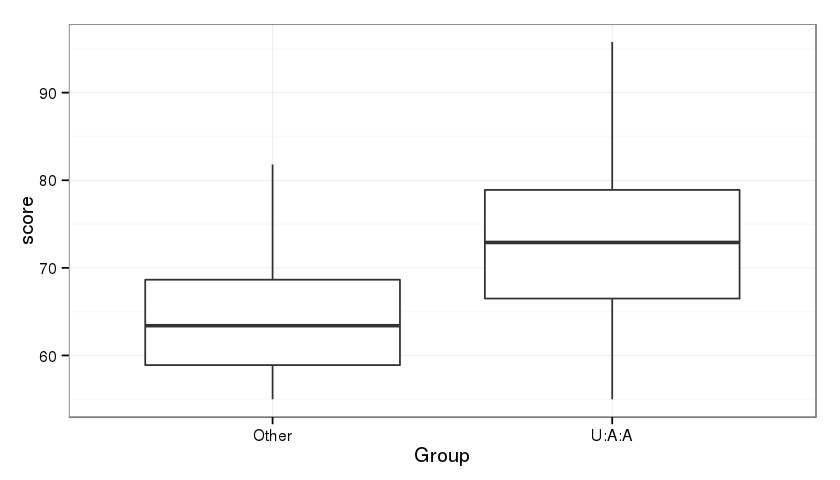

In [8]:
df$Group = ifelse(df$Interactions == "U:A:A", "U:A:A", "Other")
print(t.test(df[df$Group == "U:A:A" & df$quality & !df$restrict, ]$score, df[df$Group != "U:A:A" & df$quality & !df$restrict, ]$score))
ggplot(df[df$quality & !df$restrict, ], aes(x=Group, y=score)) + geom_boxplot()

The distribution is indeed different, both among the quality restricted set and the entire set (not shown). Maybe we should check for this interaction in the future.

Next, I'd like to look at the correlation between isotype and base triples. My hypothesis is that the enriched base triples in isotypes (e.g. A:A:A in Ile) are the product of random amplification. Initially, I tried to use a $\chi$-squared test for this. So if we don't see significance, then it means it's pretty random (no selection on what kind of alternate base triple). 

However, if we don't see significance, it could be because that we've seen enough amplifications to average out individual amplification events. Mass amplifications tend to be segregated into specific species and clades, and restricted to a few isotypes.  Thus, an amplification of 1->2 copies of a tRNA and an amplification of 1->12 copies are equally likely, so we'd expect to see enrichment for certain isotypes, IF we don't have enough data to look at. So if the $\chi$-square test is not significant, it doesn't mean there's no selection - it could mean we have enough data that individual amplifications are cancelled out. (central limit theorem)

There's also what we expect from tRNA amplifications. If the $\chi$-square test _doesn't_ show significance, then we may not have learned anything about selection - we may have just shown that there's no evidence that amplifications are not linearly distributed. 

In [10]:
chisq.test(table(df[!df$restrict & df$quality, ]$Interactions, droplevels(df[!df$restrict & df$quality, ]$isotype)), simulate.p.value=TRUE)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  table(df[!df$restrict & df$quality, ]$Interactions, droplevels(df[!df$restrict &     df$quality, ]$isotype))
X-squared = 768.61, df = NA, p-value = 0.0004998


For the rest of the interactions, we'll run much of the same analysis for 8-14-21 and examine frequencies, with the goal of a blanket annotation rule. Rules and exceptions will be examined on a case-by-case basis.

## 9-12-23

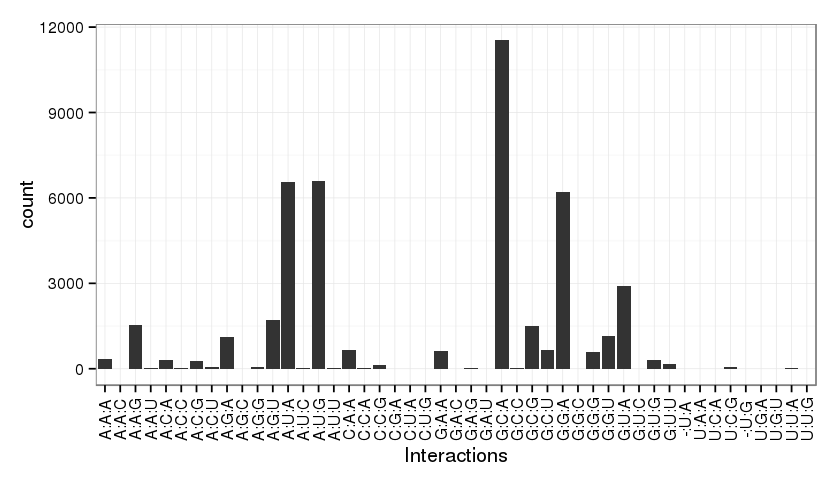

In [14]:
df$Interactions = paste0(df$X9, ':', df$X12, ':', df$X23)
ggplot(df[df$quality & !df$restrict, ], aes(x=Interactions)) + geom_histogram() + theme(axis.text.x=element_text(angle=90, vjust=0.5))

This is different from 8-14-21, in that there's a significant amount of other combinations. The "canonical" combination here is A:U:A. Here's [Gautheret et al. (1995)](http://dx.doi.org/10.1006/jmbi.1995.0200) found from looking at the Sprinzl 1991 database: ![9-12-23 frequency matrix](figures/9-12-23-gautheret.png)
And here's ours:

In [15]:
table(paste0(df[df$quality & !df$restrict, ]$X12, ':', df[df$quality & !df$restrict, ]$X23), df[df$quality & !df$restrict, ]$X9)

     
          -     A     C     G     U
  A:A     0   337   661   635     5
  A:C     0     1     0     1     0
  A:G     0  1541     0    10     0
  A:U     0    16     0     5     0
  C:A     0   316    29 11533     8
  C:C     0    11     0    18     0
  C:G     0   271   145  1494    47
  C:U     0    51     0   653     0
  G:A     0  1118     8  6224     2
  G:C     0     1     0     3     0
  G:G     0    64     0   595     0
  G:U     0  1709     0  1138     3
  U:A     1  6547     6  2909    19
  U:C     0    32     0     9     0
  U:G     1  6610     1   310     9
  U:U     0    39     0   169     0

Very, very different - there are compositional differences between Sprinzl and our quality set, in that this analysis only contains eukaryotes while Sprinzl 1991 has a lot of bacteria, archaea, and viruses. 

Again, it's useful to look at this by isotype.

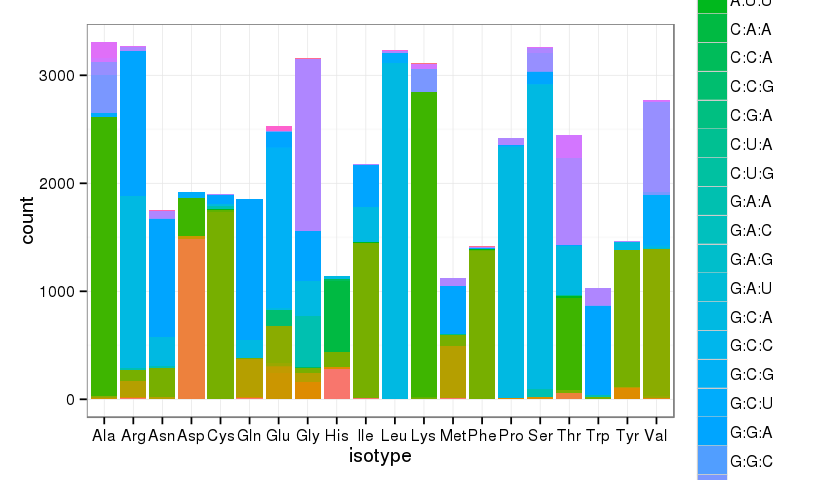

In [16]:
ggplot(df[!df$restrict & df$quality, ], aes(x=isotype, fill=Interactions)) + geom_bar()

Clearly, $3^4$ combinations is too many colors to display, so I'll filter it by the 10 most common. But this also points to the inherent stochasticity of the 9-12-23 interaction - especially interesting since 12:23 should be WC paired.

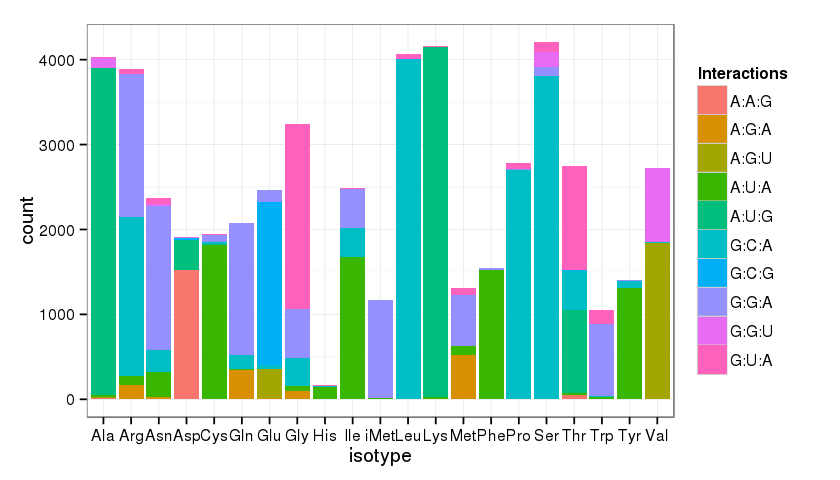

In [17]:
df2 = df %>% filter(quality | !restrict) %>% group_by(Interactions) %>% filter(n() >= 1000)
ggplot(df2, aes(x=isotype, fill=Interactions)) + geom_bar()

Even with a ridiculous cutoff of 1000+ tRNAs per triple, we still see a surprising amount of variability. It's not very convincing that the bases are conserved. My working hypothesis right now is that any two nucleotides can participate in any of the 12 interaction families, plus "in-between" bifurcated interactions, though some are energetically preferred. Which ones are energetically preferred? No idea - it would depend on an individual tRNA folding structure.

Since it is specifically a 9-23 interaction, we can just check it and not worry about base 12 too. 

In [18]:
table(df[df$quality & !df$restrict, ]$X23, df[df$quality & !df$restrict, ]$X9)

   
        -     A     C     G     U
  A     1  8318   704 21301    34
  C     0    45     0    31     0
  G     1  8486   146  2409    56
  U     0  1815     0  1965     3

x is base 9, y is base 23. Base 9 is typically a purine, base 23 is typically A, G, U. 

Last thing to check: is there a correlation between species and base triple-isotype variability? We just need to restrict to 1 tRNA per interaction per isotype per species to get a rough picture of this.

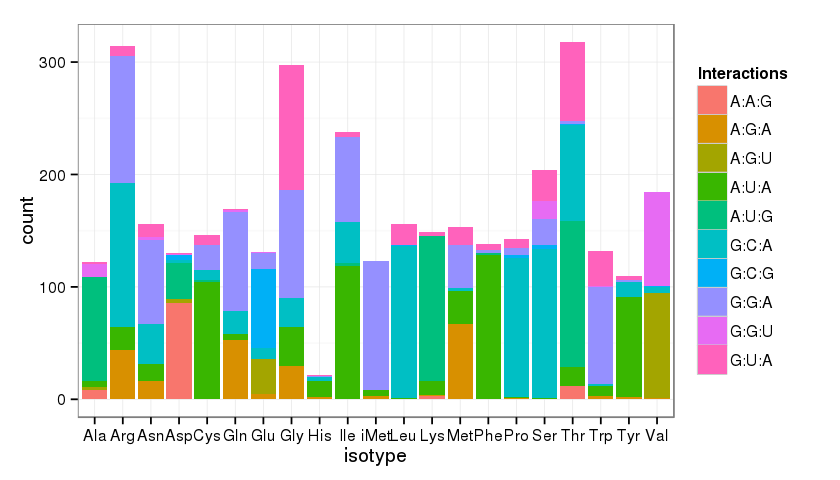

In [39]:
# filter to 1 per species
df3 = df2[!duplicated(df2[, c("species", "isotype", "Interactions")]), ]
ggplot(df3, aes(x=isotype, fill=Interactions)) + geom_bar()

Whoa, huge correlation here. Let's look at the composition by clade for a few of these:
- A:A:G, which only has a significant presence within Asp
- G:C:G in Glu
- G:C:A across all isotypes

In [68]:
table(df3[!duplicated(df3[, c("species", "clade")]), ]$clade)
table(df3[df3$isotype == 'Asp' & df3$Interactions == "A:A:G", ]$clade)
table(df3[df3$isotype == 'Glu' & df3$Interactions == "G:C:G", ]$clade)
t(signif(as.matrix(table(df3[df3$Interactions == "G:C:A", ]$clade, df3[df3$Interactions == "G:C:A", ]$isotype)) / as.vector(table(df3[!duplicated(df3[, c("species", "clade")]), ]$clade)), 2))


        Fungi       Insecta      Mammalia      Nematoda Spermatophyta 
           60             4            38             6             3 
 Streptophyta    Vertebrata 
            8            17 


        Fungi       Insecta      Mammalia      Nematoda Spermatophyta 
           11             3            38             6             3 
 Streptophyta    Vertebrata 
            8            17 


        Fungi       Insecta      Mammalia      Nematoda Spermatophyta 
            4             4            38             6             0 
 Streptophyta    Vertebrata 
            1            17 

      
       Fungi Insecta Mammalia Nematoda Spermatophyta Streptophyta Vertebrata
  Ala  0.000   0.000    0.000    0.000         0.000        0.000      0.000
  Arg  0.870   1.000    1.000    1.000         1.000        1.000      1.000
  Asn  0.570   0.000    0.053    0.000         0.000        0.000      0.000
  Asp  0.000   0.000    0.079    0.000         0.000        0.000      0.000
  Cys  0.033   0.000    0.000    0.000         0.330        0.750      0.000
  Gln  0.170   0.000    0.000    0.000         1.000        1.000      0.000
  Glu  0.000   0.000    0.160    0.330         0.000        0.000      0.120
  Gly  0.230   0.000    0.026    0.000         1.000        1.000      0.000
  His  0.067   0.000    0.000    0.000         0.000        0.000      0.000
  Ile  0.600   0.000    0.000    0.170         0.000        0.000      0.000
  iMet 0.000   0.000    0.000    0.000         0.000        0.000      0.000
  Leu  0.980   1.000    1.000    1.000         1.000        1.000    

The first table shows the total clade counts, or the maximum number of species with a specified interaction and isotype. The second table is the number of species within the clade that has an Asp tRNA with A:A:G. The third table applies to Glu and C:C:G.

An A:A:G Asp IDE is very well conserved throughout eukaryotes except in fungi. Glu and C:C:G is also conserved, but not as well.

The last table shows the proportion of species within a clade that have a G:C:A, separated by isotype. Clearly, G:C:A is a strong identity element for arginine, leucine, proline, and serine. But there's varying degrees of it elsewhere.

## 10-25-45

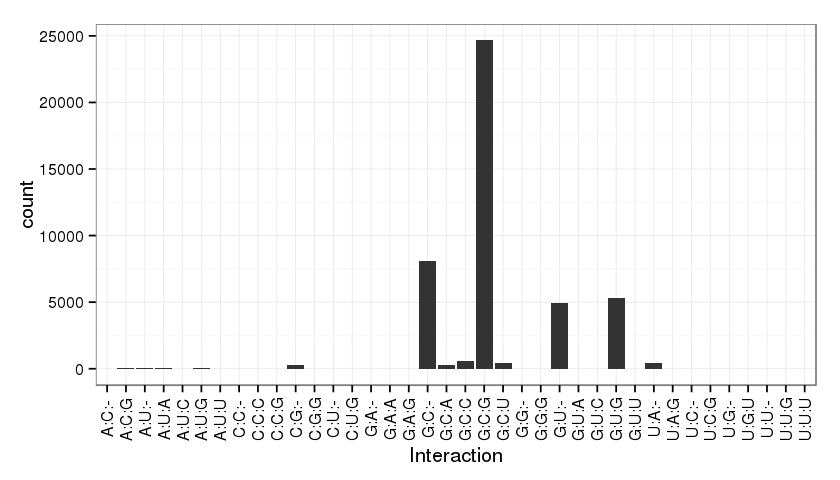

In [72]:
df$Interaction = paste0(df$X10, ':', df$X25, ':', df$X45)
ggplot(df[df$quality & !df$restrict, ], aes(x=Interaction)) + geom_histogram() + theme(axis.text.x=element_text(angle=90, vjust=0.5))

In [71]:
df2 = df %>% filter(quality | !restrict) %>% group_by(Interactions) %>% filter(n() >= 500)
ggplot(df2) + geom_bar(aes(x=isotype, fill=Interaction)

,clade,domain,isotype,seqname,species,species_long,isotype_ac,anticodon,score,isoscore,GC,D.loop,AC.loop,TPC.loop,V.arm,intron,insertions,deletions,quality,restrict,X0i1,X0i2,X0i3,X0i4,X0i5,X0i6,X0i7,X0i8,X0i9,X0i10,X0i11,X1.72,X1,X1i1,X2.71,X2,X2i1,X3.70,X3,X3i1,X3i2,X3i3,X3i4,X3i5,X3i6,X3i7,X4.69,X4,X4i1,X4i2,X4i3,X4i4,X4i5,X4i6,X4i7,X4i8,X4i9,X4i10,X4i11,X5.68,X5,X5i1,X5i2,X5i3,X5i4,X5i5,X5i6,X5i7,X6.67,X6,X6i1,X7.66,X7,X7i1,X7i2,X7i3,X7i4,X7i5,X7i6,X7i7,X7i8,X7i9,X7i10,X7i11,X7i12,X7i13,X7i14,X8,X8i1,X8i2,X8i3,X8i4,X9,X9i1,X9i2,X9i3,X10.25,X10,X10i1,X11.24,X11,X12.23,X12,X12i1,X12i2,X12i3,X12i4,X13.22,X13,X13i1,X14,X14i1,X14i2,X14i3,X14i4,X14i5,X14i6,X14i7,X14i8,X14i9,X14i10,X14i11,X14i12,X14i13,X14i14,X14i15,X14i16,X14i17,X14i18,X14i19,X14i20,X14i21,X14i22,X14i23,X14i24,X14i25,X15,X16,X16i1,X16i2,X16i3,X16i4,X16i5,X16i6,X16i7,X16i8,X16i9,X16i10,X16i11,X16i12,X16i13,X16i14,X16i15,X16i16,X16i17,X16i18,X16i19,X16i20,X17,X17i1,X17i2,X17i3,X18,X19,X20,X20i1,X20i2,X20i3,X20i4,X20i5,X20i6,X20i7,X20i8,X20i9,X20i10,X20a,X20b,X21,X21i1,X22,X22i1,X23,X23i1,X24,X24i1,X25,X25i1,X25i2,X25i3,X25i4,X25i5,X25i6,X25i7,X25i8,X25i9,X25i10,X25i11,X25i12,X25i13,X26,X26i1,X26i2,X26i3,X26i4,X27.43,X27,X27i1,X27i2,X27i3,X27i4,X27i5,X28.42,X28,X28i1,X28i2,X28i3,X28i4,X29.41,X29,X29i1,X30.40,X30,X30i1,X31.39,X31,X32,X33,X34,X35,X35i1,X36,X37,X37i1,X37i2,X37i3,X37i4,X37i5,X37i6,X37i7,X37i8,X37i9,X37i10,X37i11,X37i12,X37i13,X37i14,X37i15,X37i16,X37i17,X37i18,X37i19,X37i20,X37i21,X37i22,X37i23,X37i24,X37i25,X37i26,X37i27,X37i28,X37i29,X37i30,X37i31,X37i32,X37i33,X37i34,X37i35,X37i36,X37i37,X37i38,X37i39,X37i40,X37i41,X37i42,X37i43,X37i44,X37i45,X37i46,X37i47,X37i48,X37i49,X37i50,X37i51,X37i52,X37i53,X37i54,X37i55,X37i56,X37i57,X37i58,X37i59,X37i60,X37i61,X37i62,X37i63,X37i64,X37i65,X37i66,X37i67,X37i68,X37i69,X37i70,X37i71,X37i72,X37i73,X37i74,X37i75,X37i76,X37i77,X37i78,X37i79,X37i80,X37i81,X37i82,X37i83,X37i84,X37i85,X37i86,X37i87,X37i88,X37i89,X37i90,X37i91,X37i92,X37i93,X37i94,X37i95,X37i96,X37i97,X37i98,X37i99,X37i100,X37i101,X37i102,X37i103,X37i104,X37i105,X37i106,X37i107,X37i108,X37i109,X37i110,X37i111,X37i112,X37i113,X37i114,X37i115,X37i116,X37i117,X37i118,X37i119,X37i120,X37i121,X37i122,X37i123,X37i124,X37i125,X37i126,X37i127,X37i128,X37i129,X37i130,X37i131,X37i132,X37i133,X37i134,X37i135,X37i136,X37i137,X37i138,X37i139,X37i140,X37i141,X37i142,X37i143,X37i144,X37i145,X37i146,X37i147,X37i148,X37i149,X37i150,X37i151,X37i152,X37i153,X37i154,X37i155,X37i156,X37i157,X37i158,X37i159,X37i160,X37i161,X37i162,X37i163,X37i164,X37i165,X37i166,X37i167,X37i168,X37i169,X37i170,X37i171,X37i172,X37i173,X37i174,X37i175,X37i176,X37i177,X37i178,X37i179,X37i180,X37i181,X37i182,X37i183,X37i184,X37i185,X37i186,X37i187,X37i188,X37i189,X37i190,X37i191,X37i192,X37i193,X37i194,X37i195,X37i196,X37i197,X37i198,X37i199,X37i200,X37i201,X37i202,X37i203,X37i204,X37i205,X37i206,X37i207,X37i208,X37i209,X37i210,X37i211,X37i212,X37i213,X37i214,X37i215,X37i216,X37i217,X37i218,X37i219,X37i220,X37i221,X37i222,X37i223,X37i224,X37i225,X37i226,X37i227,X37i228,X37i229,X37i230,X37i231,X37i232,X37i233,X37i234,X37i235,X37i236,X37i237,X37i238,X37i239,X37i240,X37i241,X37i242,X37i243,X37i244,X37i245,X37i246,X37i247,X37i248,X37i249,X37i250,X37i251,X37i252,X37i253,X37i254,X37i255,X37i256,X37i257,X37i258,X37i259,X37i260,X37i261,X37i262,X37i263,X37i264,X37i265,X37i266,X37i267,X37i268,X37i269,X37i270,X37i271,X37i272,X37i273,X37i274,X37i275,X37i276,X37i277,X37i278,X37i279,X37i280,X37i281,X37i282,X37i283,X37i284,X37i285,X37i286,X37i287,X37i288,X37i289,X37i290,X37i291,X37i292,X37i293,X37i294,X37i295,X37i296,X37i297,X37i298,X37i299,X37i300,X37i301,X37i302,X37i303,X37i304,X37i305,X37i306,X37i307,X37i308,X37i309,X37i310,X37i311,X37i312,X37i313,X37i314,X37i315,X37i316,X37i317,X37i318,X37i319,X37i320,X37i321,X37i322,X37i323,X37i324,X37i325,X37i326,X37i327,X37i328,X37i329,X37i330,X37i331,X37i332,X37i333,X37i334,X37i335,X37i336,X37i337,X37i338,X37i339,X37i340,X37i341,X37i342,X37i343,X37i344,X37i345,X37i34